# Importing important libraries

In [1]:
import yfinance as yf
import pandas as pd
from datetime import date, timedelta
import datetime
from datetime import datetime

import statistics

import matplotlib as plt
plt.rcParams["figure.figsize"] = (20, 10)
import numpy as np
import matplotlib.pyplot as plt
pd.options.mode.chained_assignment = None  # default='warn'

In [39]:
stock="^NSEI"

In [55]:
df=yf.download(tickers=stock,start='2021-5-1')


[*********************100%***********************]  1 of 1 completed


In [56]:
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-05-03 00:00:00+05:30,14481.049805,14673.849609,14416.250000,14634.150391,14634.150391,448900
2021-05-04 00:00:00+05:30,14687.250000,14723.400391,14461.500000,14496.500000,14496.500000,503400
2021-05-05 00:00:00+05:30,14604.150391,14637.900391,14506.599609,14617.849609,14617.849609,455900
2021-05-06 00:00:00+05:30,14668.349609,14743.900391,14611.500000,14724.799805,14724.799805,467800
2021-05-07 00:00:00+05:30,14816.849609,14863.049805,14765.500000,14823.150391,14823.150391,488000
...,...,...,...,...,...,...
2022-10-10 00:00:00+05:30,17094.349609,17280.150391,17064.699219,17241.000000,17241.000000,234000
2022-10-11 00:00:00+05:30,17256.050781,17261.800781,16950.300781,16983.550781,16983.550781,282600
2022-10-12 00:00:00+05:30,17025.550781,17142.349609,16960.050781,17123.599609,17123.599609,256000


In [57]:
df['Shifted Open']=df['Open'].shift(-1)
df

,Open,High,Low,Close,Adj Close,Volume,Shifted Open
Date,,,,,,,
2021-05-03 00:00:00+05:30,14481.049805,14673.849609,14416.250000,14634.150391,14634.150391,448900,14687.250000
2021-05-04 00:00:00+05:30,14687.250000,14723.400391,14461.500000,14496.500000,14496.500000,503400,14604.150391
2021-05-05 00:00:00+05:30,14604.150391,14637.900391,14506.599609,14617.849609,14617.849609,455900,14668.349609
2021-05-06 00:00:00+05:30,14668.349609,14743.900391,14611.500000,14724.799805,14724.799805,467800,14816.849609
2021-05-07 00:00:00+05:30,14816.849609,14863.049805,14765.500000,14823.150391,14823.150391,488000,14928.250000
...,...,...,...,...,...,...,...
2022-10-10 00:00:00+05:30,17094.349609,17280.150391,17064.699219,17241.000000,17241.000000,234000,17256.050781
2022-10-11 00:00:00+05:30,17256.050781,17261.800781,16950.300781,16983.550781,16983.550781,282600,17025.550781
2022-10-12 00:00:00+05:30,17025.550781,17142.349609,16960.050781,17123.599609,17123.599609,256000,17087.349609


In [58]:
df=df.dropna()


In [59]:
df['profit']=((df['Shifted Open']-df['Close'])/df['Close'])-0.005*(df['Shifted Open']-df['Close'])/df['Close']

In [60]:
df['rets']=df['Close'].pct_change()

In [61]:
df=df.dropna()

<AxesSubplot: xlabel='Date'>

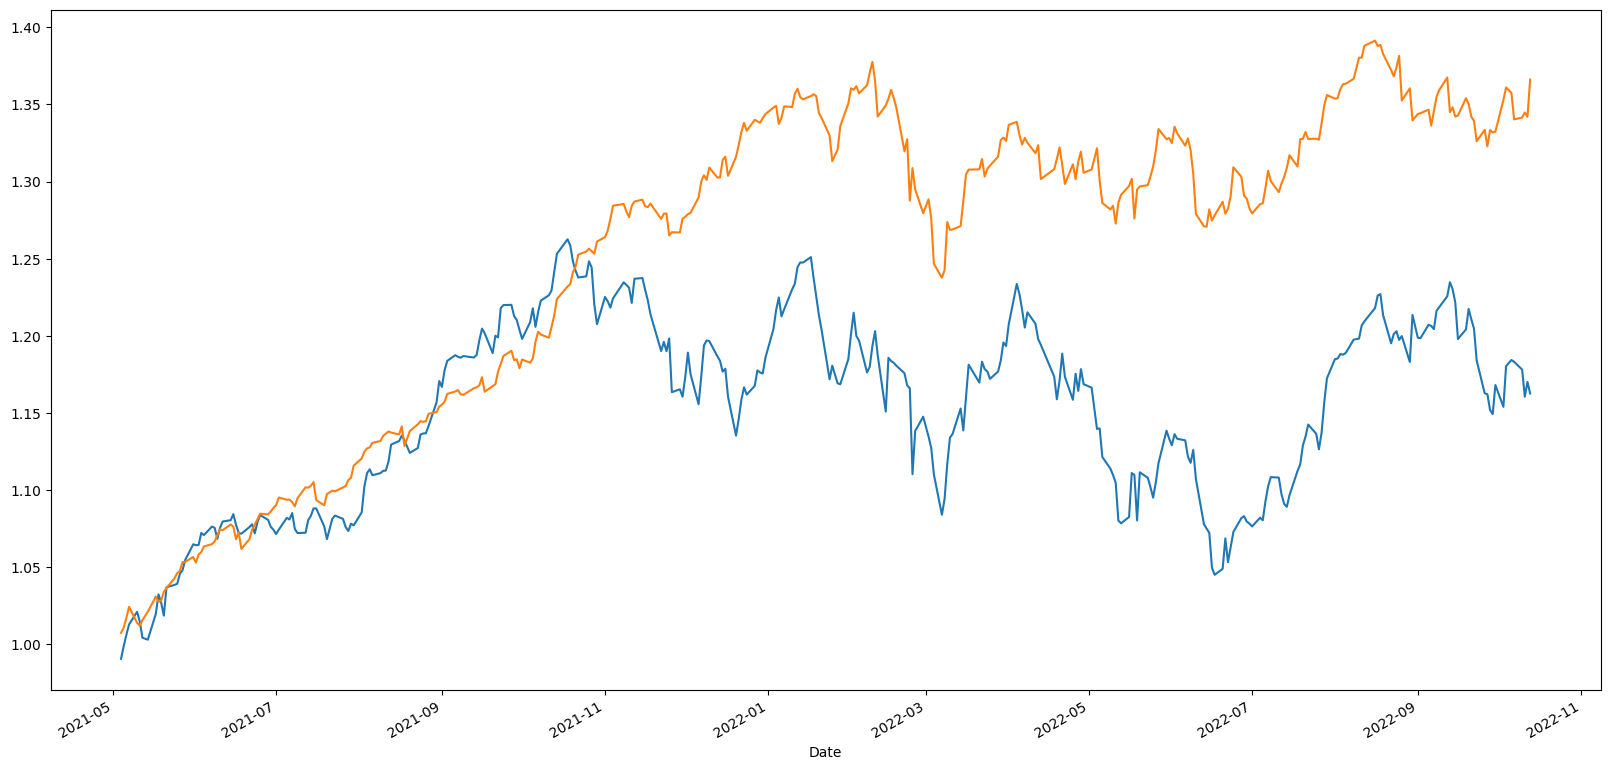

In [62]:
((1+df['rets']).cumprod()).plot()
((1+df['profit']).cumprod()).plot()

In [63]:
#df.to_csv('strats1.csv')

In [64]:
df['Hold']=(1+df['rets']).cumprod()
df['Strategy']=(1+df['profit']).cumprod()
df

,Open,High,Low,Close,Adj Close,Volume,Shifted Open,profit,rets,Hold,Strategy
Date,,,,,,,,,,,
2021-05-04 00:00:00+05:30,14687.250000,14723.400391,14461.500000,14496.500000,14496.500000,503400,14604.150391,0.007389,-0.009406,0.990594,1.007389
2021-05-05 00:00:00+05:30,14604.150391,14637.900391,14506.599609,14617.849609,14617.849609,455900,14668.349609,0.003437,0.008371,0.998886,1.010852
2021-05-06 00:00:00+05:30,14668.349609,14743.900391,14611.500000,14724.799805,14724.799805,467800,14816.849609,0.006220,0.007316,1.006194,1.017139
2021-05-07 00:00:00+05:30,14816.849609,14863.049805,14765.500000,14823.150391,14823.150391,488000,14928.250000,0.007055,0.006679,1.012915,1.024315
2021-05-10 00:00:00+05:30,14928.250000,14966.900391,14892.500000,14942.349609,14942.349609,522000,14789.700195,-0.010165,0.008041,1.021060,1.013903
...,...,...,...,...,...,...,...,...,...,...,...
2022-10-07 00:00:00+05:30,17287.199219,17337.349609,17216.949219,17314.650391,17314.650391,216300,17094.349609,-0.012660,-0.000990,1.183167,1.340364
2022-10-10 00:00:00+05:30,17094.349609,17280.150391,17064.699219,17241.000000,17241.000000,234000,17256.050781,0.000869,-0.004254,1.178135,1.341528
2022-10-11 00:00:00+05:30,17256.050781,17261.800781,16950.300781,16983.550781,16983.550781,282600,17025.550781,0.002461,-0.014932,1.160542,1.344829


In [65]:
def cagr(df):
    return (((df[-1]/df[0])**(1/(len(df)/252)))-1)*100
def vol(df):
    return ()

In [66]:
wealth_index = 100000*(1+df['rets']).cumprod()
wealth_index2 = 100000*(1+df['profit']).cumprod()

(wealth_index[-1],wealth_index2[-1])

(116264.69016113701, 136616.41676739254)

In [67]:
#Absolute Returns:
("Buy and Hold:",100*((wealth_index[-1]-wealth_index[0])/wealth_index[0]),),("Strategy :",100*((wealth_index2[-1]-wealth_index2[0])/wealth_index2[0]))


(('Buy and Hold:', 17.368672502845357), ('Strategy :', 35.61438545906348))

In [53]:
("Buy and Hold cagr",(cagr(wealth_index)),("Strategy cagr",(cagr(wealth_index2))))

('Buy and Hold cagr', 4.558947461988283, ('Strategy cagr', 7.664855297226203))

In [54]:
(np.var(df['profit']))*(252**(1/2)),(np.var(df['rets'])*(252**(1/2)))

(0.0008846929564144426, 0.001819532253133949)

In [157]:
def drawdown(wealth_index):
    return ((wealth_index-wealth_index.cummax())/wealth_index.cummax()).min()
    

In [158]:
drawdown(wealth_index),drawdown(wealth_index2)

(-0.740174667916688, -0.1262502641845647)

In [309]:
np.std(wealth_index2),np.std(wealth_index)

(34821.28841676405, 2967.0011356916943)

# Testing on 500 stocks

In [61]:
dfx=pd.read_csv('ind_nifty100list (1).csv')

In [62]:
dfx

,Company Name,Industry,Symbol,Series,ISIN Code
0,ACC Ltd.,Construction Materials,ACC,EQ,INE012A01025
1,Adani Enterprises Ltd.,Metals & Mining,ADANIENT,EQ,INE423A01024
2,Adani Green Energy Ltd.,Power,ADANIGREEN,EQ,INE364U01010
3,Adani Ports and Special Economic Zone Ltd.,Services,ADANIPORTS,EQ,INE742F01042
4,Adani Total Gas Ltd.,Oil Gas & Consumable Fuels,ATGL,EQ,INE399L01023
...,...,...,...,...,...
95,UltraTech Cement Ltd.,Construction Materials,ULTRACEMCO,EQ,INE481G01011
96,United Spirits Ltd.,Fast Moving Consumer Goods,MCDOWELL-N,EQ,INE854D01024
97,Vedanta Ltd.,Metals & Mining,VEDL,EQ,INE205A01025
98,Wipro Ltd.,Information Technology,WIPRO,EQ,INE075A01022


In [312]:
dfx['Symbol']=dfx['Symbol']+str(".NS")

In [4]:
def drawdown(wealth_index):
    return(((wealth_index - wealth_index.cummax())/wealth_index.cummax()).min())
def absolute_returns(wealth_index):
    return((wealth_index[-1]-wealth_index[0])/wealth_index[0])

In [5]:
def Strategy(ticker,start_date,n):
    df=yf.download(tickers=ticker,start=start_date)
    df['Shifted Open']=df['Open'].shift(-1)
    df['profit']=((df['Shifted Open']-df['Close'])/df['Close'])-0.004*(df['Shifted Open']-df['Close'])/df['Close']
    df['rets']=df['Close'].pct_change()
    df=df.dropna()
    Buy_Hold = n*(1+df['rets']).cumprod()
    Strategy = n*(1+df['profit']).cumprod()
    drawdown(Buy_Hold)
    drawdown(Strategy)
    
    return(("Buy and hold final portfolio value",Buy_Hold[-1],"Strategy final portfolio value",Strategy[-1]),("Buy and hold dd",drawdown(Buy_Hold),"Strategy dd", drawdown(Strategy)),(absolute_returns(Buy_Hold),absolute_returns(Strategy)),Buy_Hold.plot(),Strategy.plot())

[*********************100%***********************]  1 of 1 completed


(('Buy and hold final portfolio value',
  114028.19340772707,
  'Strategy final portfolio value',
  292973.32272724237),
 ('Buy and hold dd', -0.5248074025304083, 'Strategy dd', -0.1140399671891049),
 (-0.006821282241654252, 1.9007594429201893),
 <AxesSubplot: xlabel='Date'>,
 <AxesSubplot: xlabel='Date'>)

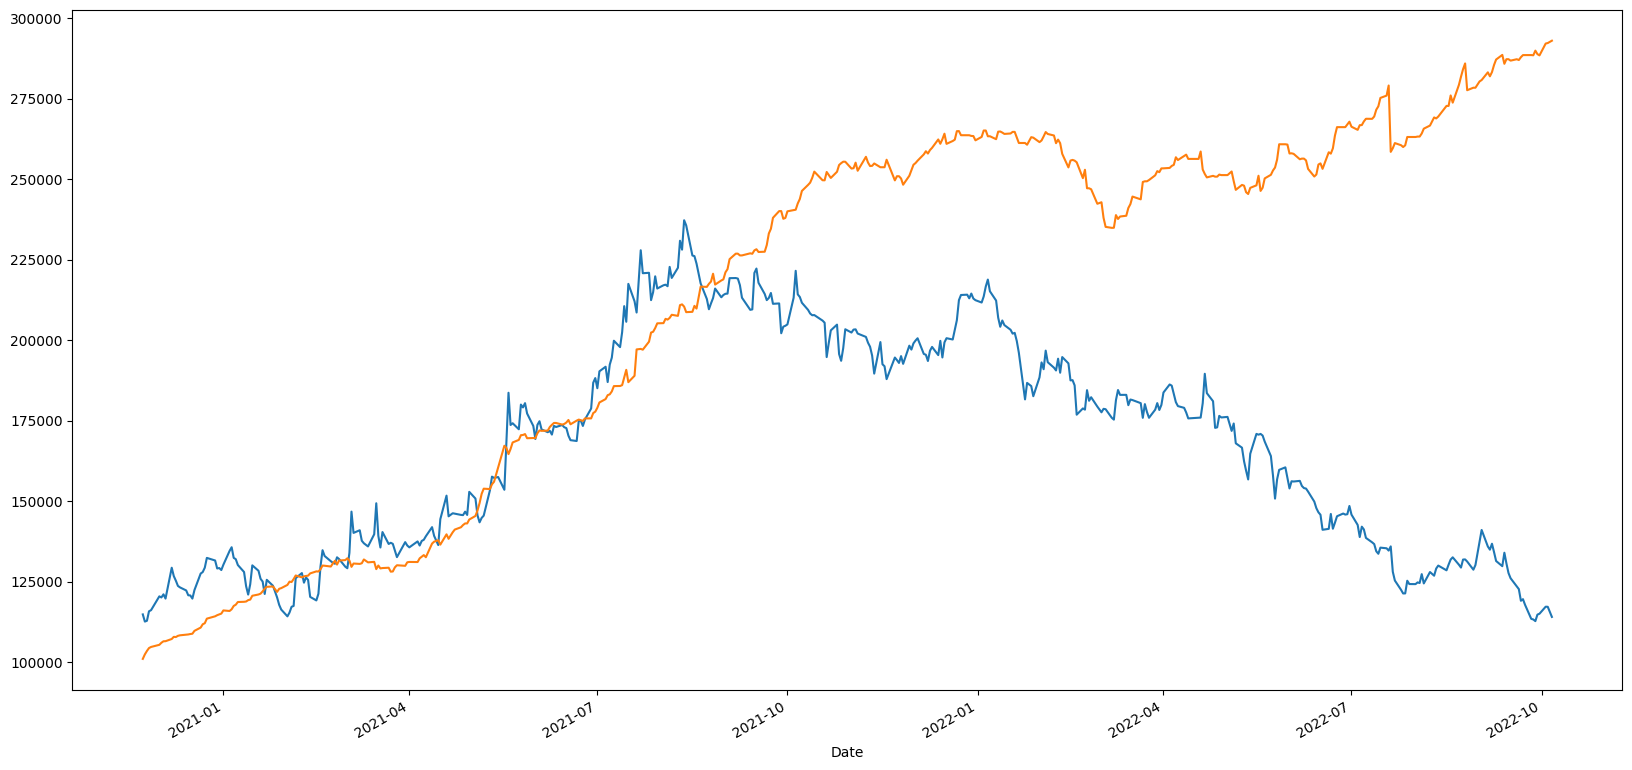

In [317]:
Strategy("GLAND.NS",'2020-1-9',100000)

In [22]:
def Strategy1(ticker,start_date,N):
    df=yf.download(tickers=ticker,start=start_date)
    df['Shifted Open']=df['Open'].shift(-1)
    df['profit']=((df['Shifted Open']-df['Close'])/df['Close'])-0.0035*(df['Shifted Open']-df['Close'])/df['Close']
    df['rets']=df['Close'].pct_change()
    df=df.dropna()
    Buy_Hold = N*(1+df['rets']).cumprod()
    Strategy = N*(1+df['profit']).cumprod()
    if(len(Buy_Hold)<1):
        return(ticker,0,0,0,0,0,0,0)
    drawdown(Buy_Hold)
    drawdown(Strategy)
    
    return(ticker,Buy_Hold[-1],Strategy[-1],drawdown(Buy_Hold),drawdown(Strategy),absolute_returns(Buy_Hold),absolute_returns(Strategy))

In [252]:
ticker=["RELIANCE.NS","VBL.NS"]

In [229]:
Strategy1("VBL.NS",'2019-1-1',100000)

[*********************100%***********************]  1 of 1 completed


('VBL.NS',
 473058.85411057173,
 2022663.5348933807,
 -0.37689771987949827,
 -0.40538939134026836,
 3.8477308687977394,
 19.215240865916893)

In [10]:
dfx

,SYMBOL,NAMEOFCOMPANY,SERIES,DATEOFLISTING,Symbol
0,20MICRONS,20MicronsLimited,EQ,06-Oct-08,20MICRONS.NS
1,21STCENMGM,21stCenturyManagementServicesLimited,EQ,03-May-95,21STCENMGM.NS
2,3IINFOLTD,3iInfotechLimited,EQ,22-Oct-21,3IINFOLTD.NS
3,3MINDIA,3MIndiaLimited,EQ,13-Aug-04,3MINDIA.NS
4,3PLAND,3PLandHoldingsLimited,EQ,19-Jul-95,3PLAND.NS
...,...,...,...,...,...
1850,ZOTA,ZotaHealthCareLImited,EQ,19-Aug-19,ZOTA.NS
1851,ZUARI,ZuariAgroChemicalsLimited,EQ,27-Nov-12,ZUARI.NS
1852,ZUARIIND,ZUARIINDUSTRIESLIMITED,EQ,12-Apr-95,ZUARIIND.NS
1853,ZYDUSLIFE,ZydusLifesciencesLimited,EQ,18-Apr-00,ZYDUSLIFE.NS


In [45]:
lst=[]
for i in range(len(dfx)):
    lst.append(Strategy1(dfx.iloc[i,4],'2021-1-8',100000))

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

In [34]:
lst

[('20MICRONS.NS',
  236734.68154102436,
  1496976.3098888043,
  -0.39687960376846604,
  -0.13690737014754328,
  1.4742786009929922,
  13.803185186073788),
 ('21STCENMGM.NS',
  214418.5975540511,
  657007.2772505396,
  -0.662948213250514,
  -0.5777758051326876,
  1.1146789030960074,
  5.570072772505396),
 ('3IINFOLTD.NS',
  51764.70588235299,
  1062155.1687679815,
  -0.7040909160267222,
  -0.6126411332576234,
  -0.5056179775280895,
  9.16624115677095),
 ('3MINDIA.NS',
  115621.05490170528,
  326101.2646487177,
  -0.42642508309234767,
  -0.04685425465098645,
  0.15664427015614021,
  2.261050037739667),
 ('3PLAND.NS',
  153881.28470296843,
  25256718.704435926,
  -0.4933078319966453,
  -0.22689505106552008,
  0.5971564053873343,
  261.48438354271553),
 ('4THDIM.NS',
  22967.03324649798,
  24499.702919382806,
  -0.9120879120879121,
  -0.910332864010989,
  -0.7703296675350203,
  -0.755002970806172),
 ('5PAISA.NS',
  110250.70998645379,
  5059516.061207614,
  -0.5167208962326237,
  -0.086092

In [46]:
df = pd.DataFrame(lst,columns=['Stock','Hold_pf_final','Strategy_pf_final','Hold_dd','Strategy_dd','Hold_returns','Strategy_returns','gap','Variance'])


In [47]:
df['gap_ab']=abs(df['gap'])

In [48]:
df=df.dropna()


In [49]:
#df=df.sort_values('Variance',ascending=False)

In [54]:
df=df.loc[df['Variance']!=0]

In [55]:
df=df.sort_values('Strategy_returns')

In [366]:
df=df.head(90)

(-0.010348392314941515, 0.9769532931508995)

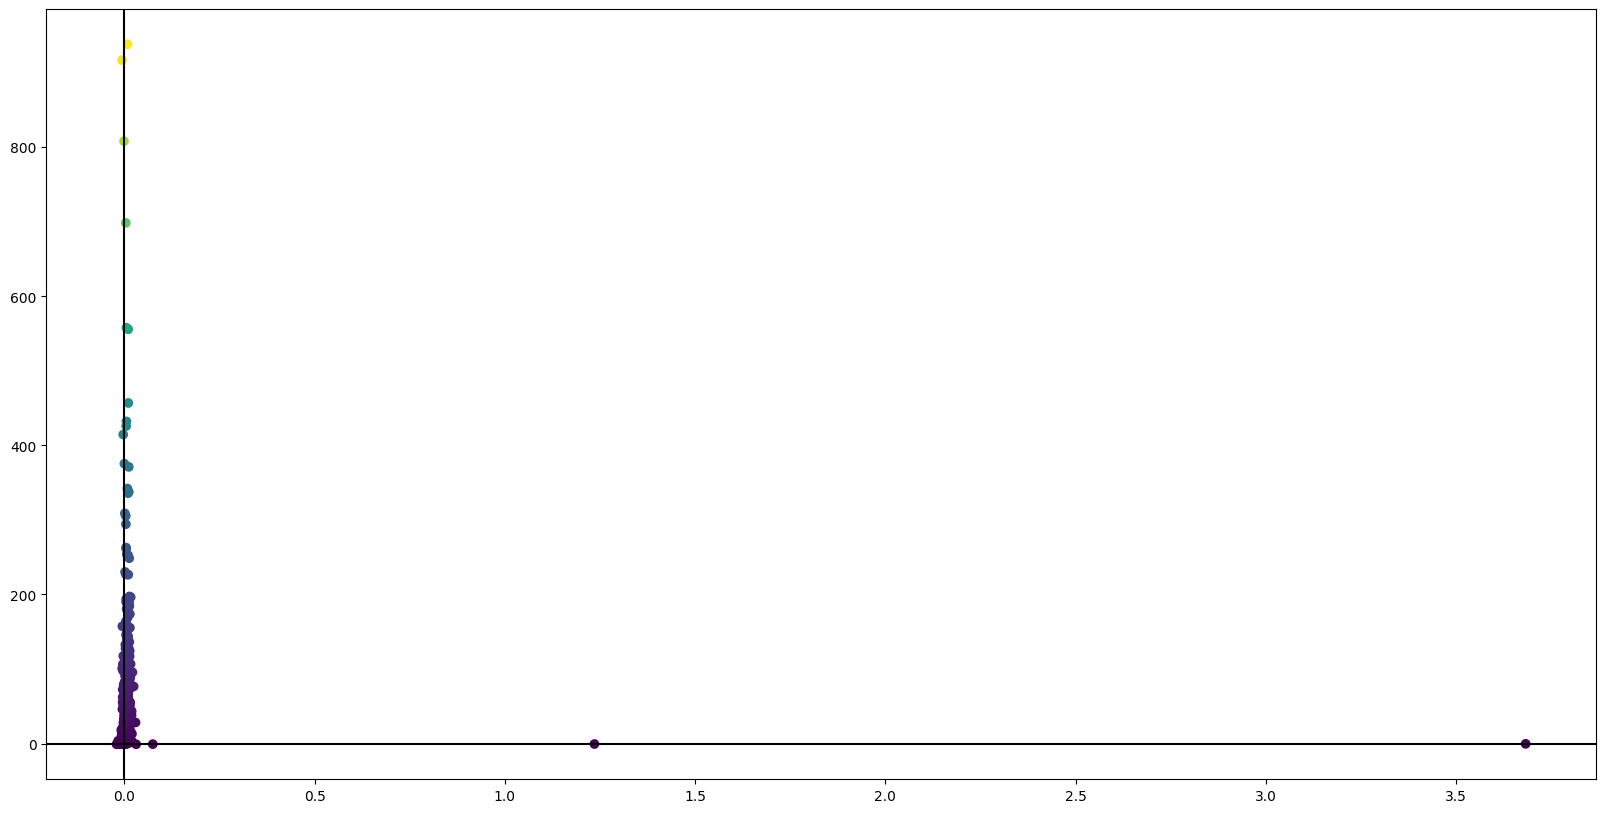

In [59]:
plt.scatter((df['gap']),df['Strategy_returns'],c=df['Strategy_returns'], cmap='viridis')


#plt.scatter(df['Hold_returns'],df['Strategy_returns'])
plt.axhline(y = 0,color='black')
plt.axvline(x = 0,color='black')
(df['Variance'].corr(df['Strategy_returns']),abs(df['gap']).corr(df['Variance']))

[*********************100%***********************]  1 of 1 completed


(('Buy and hold final portfolio value',
  472320.1190947383,
  'Strategy final portfolio value',
  8052894.203325219),
 ('Buy and hold dd', -0.5781769777872445, 'Strategy dd', -0.34720778629582477),
 (3.6853603313501995, 79.47057251350681),
 <AxesSubplot: xlabel='Date'>,
 <AxesSubplot: xlabel='Date'>)

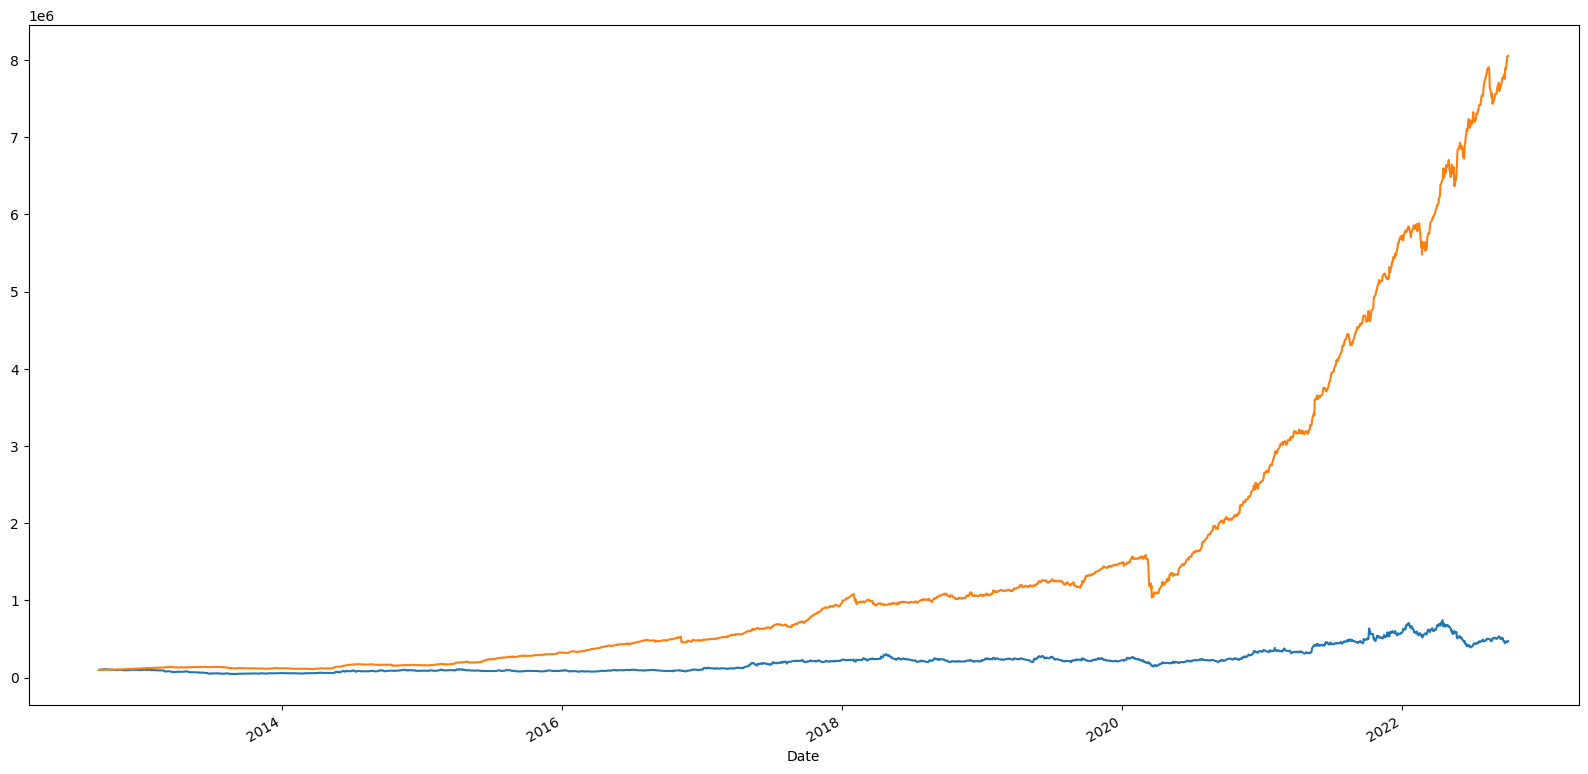

In [318]:
Strategy("CHAMBLFERT.NS",'2012-9-7',100000)

# Gappy Stocks

In [8]:
def Gaps(ticker,start_date):
    start_date=datetime.strptime(start_date, '%Y-%m-%d')
     
    df=yf.download(tickers=ticker,start=start_date-timedelta(400),end=start_date-timedelta(1))
    df['Shifted Open']=df['Open'].shift(-1)
    df['profit']=((df['Shifted Open']-df['Close'])/df['Close'])-0.003*(df['Shifted Open']-df['Close'])/df['Close']
    df['rets']=df['Close'].pct_change()
    df=df.dropna()
    avg_gap=df['profit'].mean()
    return avg_gap

In [9]:
def Variance(ticker,start_date):
    start_date=datetime.strptime(start_date, '%Y-%m-%d')
    df=yf.download(tickers=ticker,start=start_date-timedelta(400),end=start_date-timedelta(1))
    df['Shifted Open']=df['Open'].shift(-1)
    df['profit']=((df['Shifted Open']-df['Close'])/df['Close'])-0.003*(df['Shifted Open']-df['Close'])/df['Close']
    df['rets']=df['Close'].pct_change()
    df=df.dropna()
    var=df['profit'].var()
    return var

In [91]:
df['gap_magnitude']=abs(df['gap'])

In [93]:
df.sort_values('gap_magnitude')

,Stock,Hold_pf_final,Strategy_pf_final,Hold_dd,Strategy_dd,Hold_returns,Strategy_returns,gap,gap_magnitude
41,TCS.NS,98487.104870,99811.943384,-0.080451,-0.042569,-0.021359,-0.009776,-0.000027,0.000027
37,SBILIFE.NS,93511.319797,100378.819774,-0.065803,-0.028171,-0.055058,0.000495,0.000048,0.000048
9,BRITANNIA.NS,102716.817501,101957.968402,-0.044003,-0.018804,0.025840,0.016035,-0.000054,0.000054
26,INFY.NS,99828.491067,101693.625988,-0.116185,-0.036464,-0.014059,0.008691,-0.000066,0.000066
10,CIPLA.NS,107888.725742,101812.629304,-0.029537,-0.024877,0.074239,0.014344,0.000126,0.000126
23,ICICIBANK.NS,101055.695032,100356.137780,-0.080819,-0.043081,-0.014853,-0.008916,-0.000135,0.000135
40,SUNPHARMA.NS,106730.072662,104147.109335,-0.029353,-0.015210,0.066644,0.041239,0.000216,0.000216
45,TECHM.NS,97674.866001,99180.325340,-0.125728,-0.062726,-0.053506,-0.019900,0.000296,0.000296
2,ASIANPAINT.NS,97900.211907,101229.419569,-0.074986,-0.012352,-0.035129,0.002574,0.000326,0.000326
29,LT.NS,97694.192075,100175.989942,-0.088307,-0.025024,-0.031123,0.000270,0.000395,0.000395


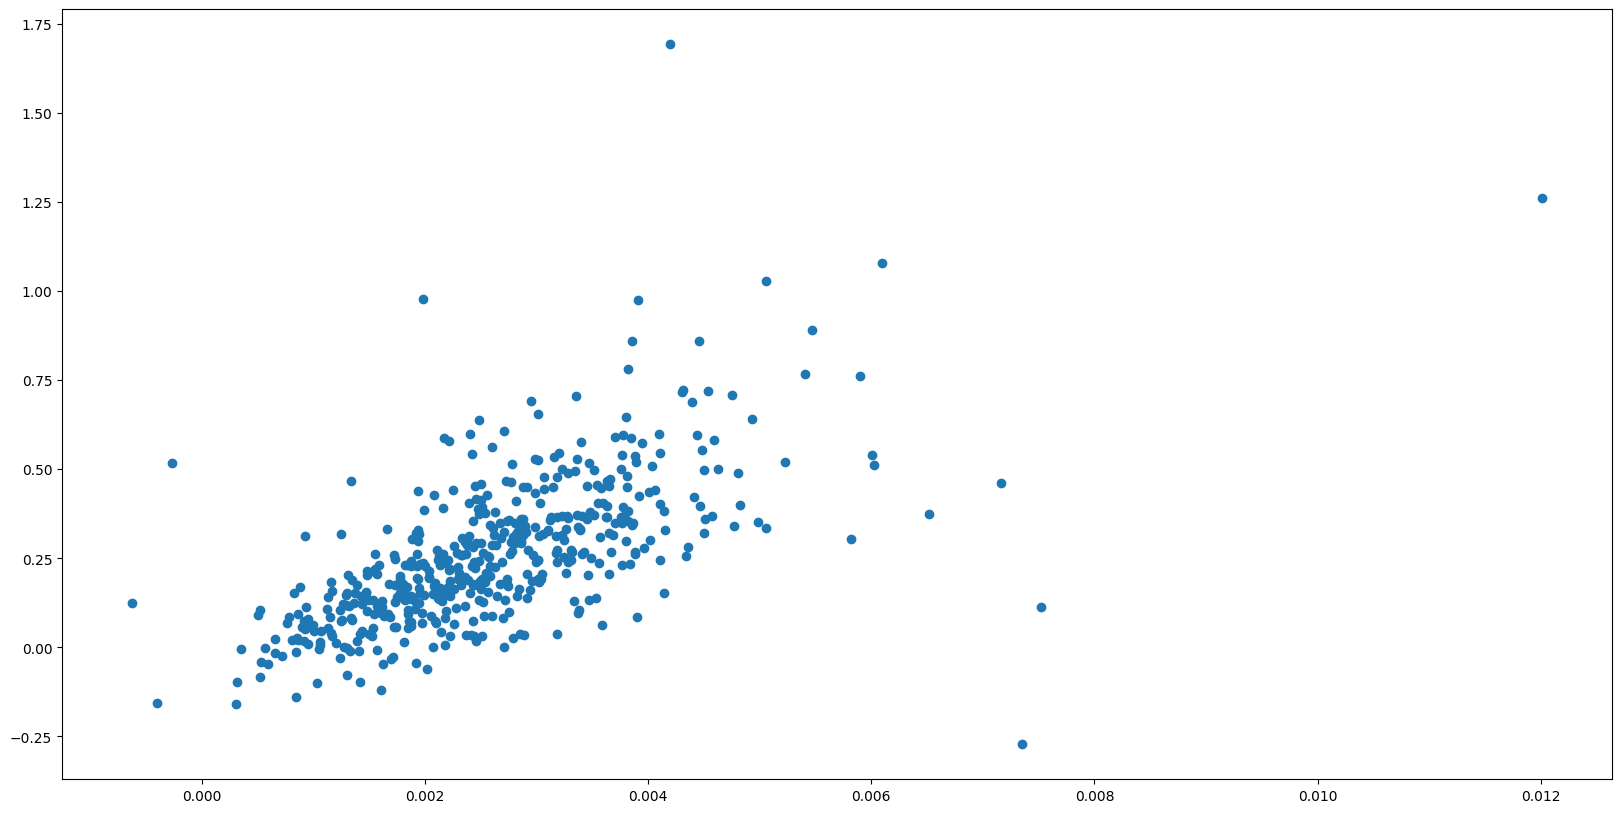

In [97]:
plt.scatter(df['gap'],df['Strategy_returns'],marker='o')

In [104]:
df['gap'].corr(df['Strategy_returns'])

0.7311863763213144

In [44]:
def Strategy1(ticker,start_date,N):
    df=yf.download(tickers=ticker,start=start_date)
    df['Shifted Open']=df['Open'].shift(-1)
    df['profit']=((df['Shifted Open']-df['Close'])/df['Close'])-0.0035*(df['Shifted Open']-df['Close'])/df['Close']
    df['rets']=df['Close'].pct_change()
    df=df.dropna()
    Buy_Hold = N*(1+df['rets']).cumprod()
    Strategy = N*(1+df['profit']).cumprod()
    drawdown(Buy_Hold)
    drawdown(Strategy)
    if(len(Buy_Hold)<1):
        return(ticker,0,0,0,0,0,0,0,0)
    Gaps(ticker,start_date)
    Variance(ticker,start_date)
    return(ticker,Buy_Hold[-1],Strategy[-1],drawdown(Buy_Hold),drawdown(Strategy),absolute_returns(Buy_Hold),absolute_returns(Strategy),Gaps(ticker,start_date),Variance(ticker,start_date))

In [215]:
df.loc[df['Strategy_returns']<0]

,Stock,Hold_pf_final,Strategy_pf_final,Hold_dd,Strategy_dd,Hold_returns,Strategy_returns,gap,gap_ab
74,HDFCBANK.NS,100373.692976,90743.139102,-0.241251,-0.254545,-0.009956,-0.093191,0.002524,0.002524
7,ATGL.NS,895627.438835,95318.778996,-0.502880,-0.680932,8.056810,-0.046942,0.002056,0.002056


In [231]:
Strategy1("rtnindia.NS",'2021-10-1',100000)

[*********************100%***********************]  1 of 1 completed


('rtnindia.NS',
 113698.63037559882,
 710641.4598425078,
 -0.5074862155359844,
 -0.2062141505098603,
 0.1343962985446285,
 6.010928868035271)

In [101]:
Gaps('TCS.NS','2022-10-4')

[*********************100%***********************]  1 of 1 completed


-3.1123973963371644e-05